In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
    
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)
    
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)

In [3]:
X_train , y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [4]:
X_train

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_test.shape

(12630, 32, 32, 3)

In [8]:
y_test.shape

(12630,)

In [9]:
X_valid.shape

(4410, 32, 32, 3)

In [10]:
y_valid.shape

(4410,)

Text(0.5, 1.0, '23')

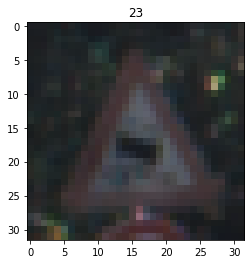

In [11]:
plt.imshow(X_train[2000])
plt.title(y_train[2000])

In [12]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_test, y_test)

In [13]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims = True)

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

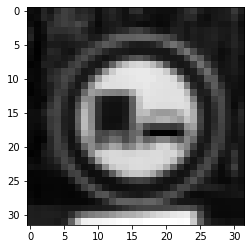

In [15]:
plt.imshow(X_train_gray[2000].squeeze(), cmap = 'gray')

In [16]:
X_train_gray_norm = X_train_gray/256
X_test_gray_norm = X_test_gray/256
X_valid_gray_norm = X_valid_gray/256

In [17]:
from keras.layers import Dense, MaxPooling2D, Flatten, Dropout, Conv2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.models import Sequential

Using TensorFlow backend.


In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32, 32, 1)))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Flatten())

cnn_model.add(Dense(144, activation = 'relu'))
cnn_model.add(Dense(86, activation ='relu'))
cnn_model.add(Dense(43, activation = 'sigmoid'))

In [19]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [20]:
history = cnn_model.fit(X_train_gray_norm, y_train, epochs = 50, verbose = 1, validation_data = (X_valid_gray_norm, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 12630 samples
Epoch 1/50





34799/34799 [==============================] - 32s 908us/step - loss: 1.4272 - acc: 0.6025 - val_loss: 0.7203 - val_acc: 0.8130
Epoch 2/50
34799/34799 [==============================] - 31s 902us/step - loss: 0.2972 - acc: 0.9170 - val_loss: 0.5151 - val_acc: 0.8803
Epoch 3/50
34799/34799 [==============================] - 31s 903us/step - loss: 0.1597 - acc: 0.9593 - val_loss: 0.5141 - val_acc: 0.8918
Epoch 4/50
34799/34799 [==============================] - 31s 905us/step - loss: 0.1110 - acc: 0.9716 - val_loss: 0.4309 - val_acc: 0.9047
Epoch 5/50
34799/34799 [==============================] - 32s 910us/step - loss: 0.0806 - acc: 0.9789 - val_loss: 0.5255 - val_acc: 0.8946
Epoch 6/50
34799/34799 [==============================] - 32s 910us/step - loss: 0.0571 - acc: 0.9854 - val_loss: 0.4274 - val_acc: 0.9138
Epoch 7/50
347

Epoch 44/50
34799/34799 [==============================] - 31s 882us/step - loss: 0.0091 - acc: 0.9976 - val_loss: 0.5384 - val_acc: 0.9258
Epoch 45/50
34799/34799 [==============================] - 31s 892us/step - loss: 0.0104 - acc: 0.9977 - val_loss: 0.5636 - val_acc: 0.9219
Epoch 46/50
34799/34799 [==============================] - 31s 885us/step - loss: 0.0090 - acc: 0.9980 - val_loss: 0.5231 - val_acc: 0.9263
Epoch 47/50
34799/34799 [==============================] - 31s 882us/step - loss: 0.0115 - acc: 0.9973 - val_loss: 0.5197 - val_acc: 0.9288
Epoch 48/50
34799/34799 [==============================] - 31s 879us/step - loss: 0.0063 - acc: 0.9983 - val_loss: 0.5010 - val_acc: 0.9280
Epoch 49/50
34799/34799 [==============================] - 31s 899us/step - loss: 0.0089 - acc: 0.9982 - val_loss: 0.5213 - val_acc: 0.9255
Epoch 50/50
34799/34799 [==============================] - 31s 895us/step - loss: 0.0070 - acc: 0.9985 - val_loss: 0.5318 - val_acc: 0.9260


In [21]:
score = cnn_model.evaluate(X_test_gray_norm, y_test, verbose = 1)
print(score[1])

12630/12630 [==============================] - 5s 367us/step
0.9261282660804471


In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

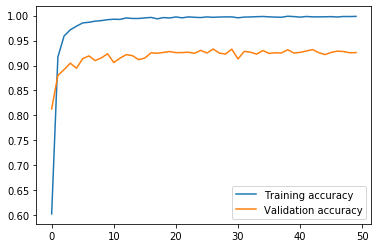

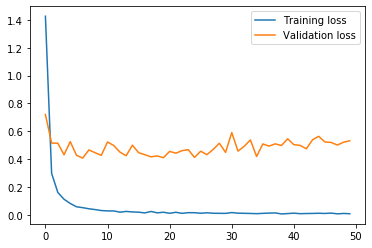

In [23]:
epochs = range(len(acc))
plt.figure()
plt.plot(epochs, acc, label = 'Training accuracy')
plt.plot(epochs, val_acc, label = 'Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.legend()

In [27]:
predictions = cnn_model.predict_classes(X_test_gray_norm)

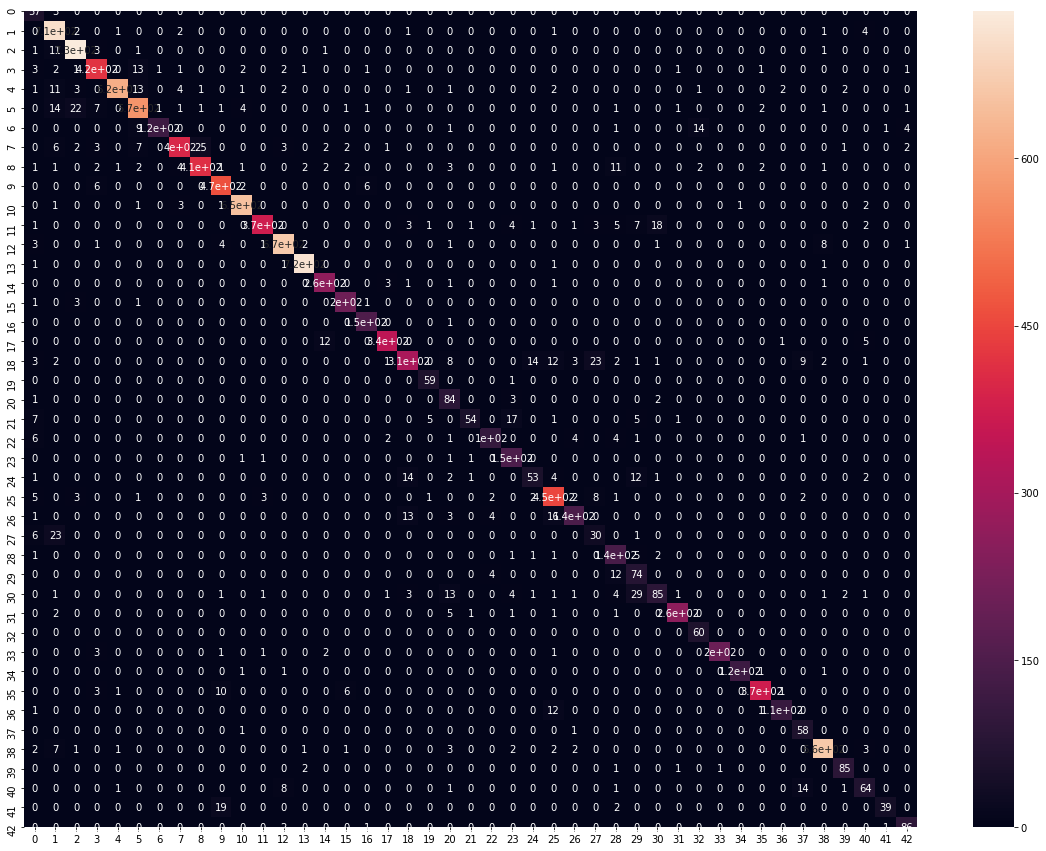

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize = (20, 15))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70        60
           1       0.89      0.98      0.94       720
           2       0.95      0.98      0.96       750
           3       0.94      0.93      0.94       450
           4       0.99      0.93      0.96       660
           5       0.92      0.91      0.91       630
           6       0.98      0.80      0.88       150
           7       0.96      0.88      0.92       450
           8       0.94      0.91      0.93       450
           9       0.92      0.97      0.95       480
          10       0.98      0.99      0.98       660
          11       0.98      0.89      0.93       420
          12       0.97      0.97      0.97       690
          13       0.99      0.99      0.99       720
          14       0.93      0.97      0.95       270
          15       0.94      0.97      0.96       210
          16       0.94      0.99      0.96       150
          17       0.98    

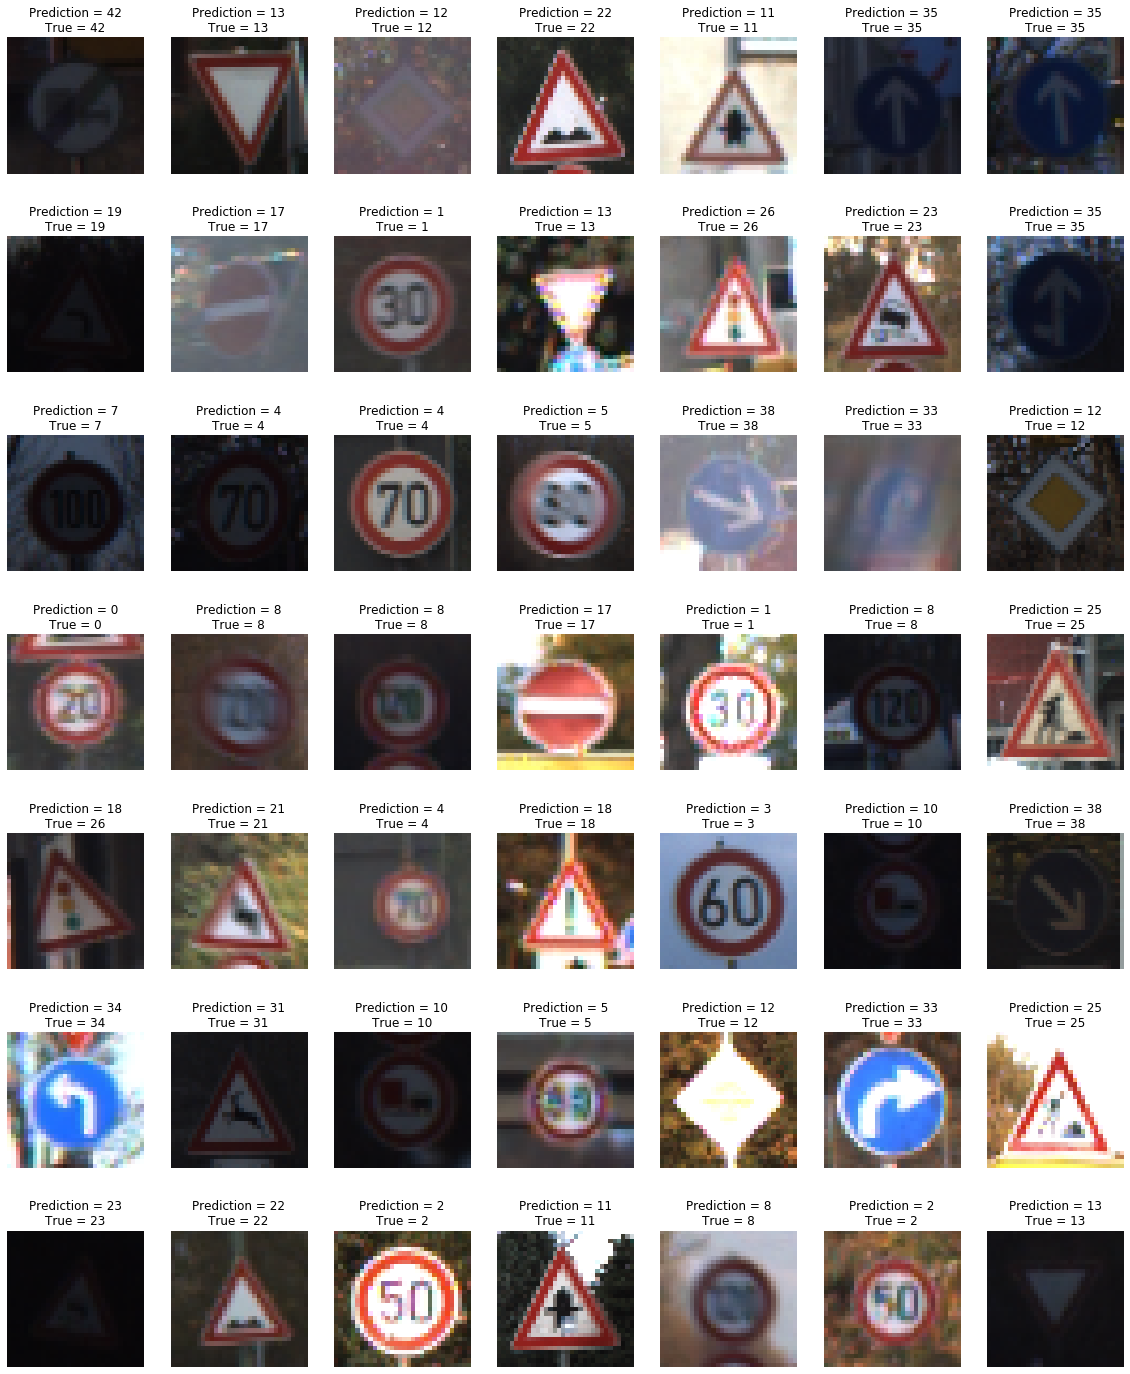

In [39]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (20,25))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\nTrue = {}".format(predictions[i], y_test[i]))
    axes[i].axis('off')
    
   